In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
from keras.preprocessing.image import load_img

In [2]:
img=load_img("/kaggle/input/intel-image-classification/seg_pred/seg_pred/16040.jpg")

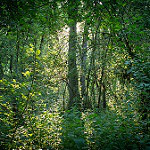

In [3]:
img

In [4]:
img.size

(150, 150)

In [5]:
import os

In [6]:
from os import listdir

In [7]:
listdir('/kaggle/input')

['intel-image-classification']

In [8]:
listdir('/kaggle/input/intel-image-classification')

['seg_train', 'seg_pred', 'seg_test']

In [9]:
listdir('/kaggle/input/intel-image-classification/seg_train/')

['seg_train']

In [10]:
listdir('/kaggle/input/intel-image-classification/seg_train/seg_train')

['buildings', 'mountain', 'street', 'forest', 'sea', 'glacier']

In [11]:
listdir('/kaggle/input/intel-image-classification/seg_train/seg_train/buildings')

['11494.jpg',
 '15487.jpg',
 '13609.jpg',
 '10899.jpg',
 '9627.jpg',
 '14856.jpg',
 '4979.jpg',
 '2612.jpg',
 '1593.jpg',
 '12668.jpg',
 '18279.jpg',
 '12996.jpg',
 '19159.jpg',
 '3056.jpg',
 '13050.jpg',
 '15397.jpg',
 '19638.jpg',
 '1242.jpg',
 '263.jpg',
 '1542.jpg',
 '6436.jpg',
 '14365.jpg',
 '9767.jpg',
 '15322.jpg',
 '5440.jpg',
 '7379.jpg',
 '4795.jpg',
 '4459.jpg',
 '14556.jpg',
 '4571.jpg',
 '495.jpg',
 '16902.jpg',
 '1859.jpg',
 '16463.jpg',
 '12330.jpg',
 '11795.jpg',
 '19153.jpg',
 '8481.jpg',
 '1055.jpg',
 '11599.jpg',
 '4161.jpg',
 '11037.jpg',
 '4294.jpg',
 '8556.jpg',
 '4253.jpg',
 '16423.jpg',
 '14852.jpg',
 '11084.jpg',
 '17427.jpg',
 '16243.jpg',
 '10196.jpg',
 '16578.jpg',
 '18151.jpg',
 '17875.jpg',
 '10357.jpg',
 '17073.jpg',
 '15429.jpg',
 '18375.jpg',
 '7553.jpg',
 '16614.jpg',
 '18072.jpg',
 '3856.jpg',
 '5477.jpg',
 '14016.jpg',
 '10231.jpg',
 '10310.jpg',
 '12494.jpg',
 '18593.jpg',
 '5650.jpg',
 '13568.jpg',
 '11209.jpg',
 '13888.jpg',
 '19293.jpg',
 '13284

In [12]:
x_train, y_train = list(), list()

In [13]:

from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array

In [14]:
folder='/kaggle/input/intel-image-classification/seg_train/seg_train'
for file1 in listdir(folder):
    file2=folder+'/'+file1
    for file3 in listdir(file2):
        file4=file2+'/'+file3
        image = load_img(file4,target_size=(150,150))
        image=img_to_array(image)
        x_train.append(image)
        y_train.append(file1)
        

In [15]:
from numpy import asarray


In [16]:
x_train=asarray(x_train)
y_train=asarray(y_train)

In [17]:
x_train.shape

(14034, 150, 150, 3)

In [18]:
y_train.shape

(14034,)

In [19]:
x_test, y_test = list(), list()

In [20]:
folder='/kaggle/input/intel-image-classification/seg_test/seg_test'
for file1 in listdir(folder):
    file2=folder+'/'+file1
    for file3 in listdir(file2):
        file4=file2+'/'+file3
        image = load_img(file4,target_size=(150,150))
        image=img_to_array(image)
        x_test.append(image)
        y_test.append(file1)
        

In [21]:
x_test=asarray(x_test)
y_test=asarray(y_test)

In [22]:
x_test.shape

(3000, 150, 150, 3)

In [23]:
y_test.shape

(3000,)

In [24]:
# baseline cnn model for fashion mnist
from numpy import mean
from numpy import std
from matplotlib import pyplot
from sklearn.model_selection import KFold
from keras.datasets import fashion_mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD

In [25]:
import numpy
numpy.unique(y_train)

array(['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street'],
      dtype='<U9')

In [26]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [27]:
y_train=le.fit_transform(y_train)

In [28]:
numpy.unique(y_train)

array([0, 1, 2, 3, 4, 5])

In [29]:
y_test=le.fit_transform(y_test)

In [30]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [31]:
train_norm = x_train.astype('float32')
test_norm = x_test.astype('float32')

In [32]:
train_norm = train_norm / 255.0
test_norm = test_norm / 255.0

In [33]:
# example of loading the vgg16 model
from keras.applications.vgg16 import VGG16

In [34]:
# load model without classifier layers
model = VGG16(include_top=False, input_shape=(150, 150, 3))

58892288/58889256 [==============================] - 2s 0us/step


In [36]:
from keras.models import Model

In [37]:
# define cnn model
def define_model():
# load model
  model = VGG16(include_top=False, input_shape=(150, 150, 3))
# mark loaded layers as not trainable
  for layer in model.layers:
    layer.trainable = False
# add new classifier layers
  flat1 = Flatten()(model.layers[-1].output)
  class1 = Dense(128, activation="relu", kernel_initializer="he_uniform")(flat1)
  output = Dense(6, activation="softmax")(class1)
# define new model
  model = Model(inputs=model.inputs, outputs=output)
# compile model
  opt = SGD(lr=0.001, momentum=0.9)
  model.compile(optimizer=opt, loss="categorical_crossentropy", metrics=["accuracy"])
  return model

In [38]:
k1=define_model()

In [ ]:
k1.fit(train_norm, y_train, epochs=5, batch_size=64, validation_data=(test_norm, y_test), verbose=0)

In [ ]:
_, acc =k1.evaluate(test_norm, y_test, verbose=0)

In [ ]:
acc